In [1]:
import numpy as np
def get_column(data, index):
    result = [row[index] for row in data]
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    # get tv (index=0)
    tv_data = get_column(data, 0)

    # get radio (index=1)
    radio_data = get_column(data, 1)

    # get newspaper (index=2)
    newspaper_data = get_column(data, 2)

    # get sales (index=3)
    sales_data = get_column(data, 3)

    # building X input and y output for training
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data

    return X, y

In [2]:
X, y = prepare_data("advertising.csv")

In [15]:
sums = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y[:5])]
print(sums)


[624.1, 175.10000000000002, 300.5, 78.9]


In [7]:
def initialize_params():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b

def predict (x1, x2, x3, w1, w2, w3, b):
    result = w1*x1 + w2*x2 + w3*x3 + b
    return result

y = predict( x1 =1 , x2 =1 , x3 =1 , w1 =0 , w2 =0.5 , w3 =0 , b =0.5)
print (y)

1.0


In [19]:
def compute_loss(y_hat, y):
    loss = (y_hat - y)**2
    return loss

l = compute_loss( y_hat =1 , y =0.5)
print (l)

0.25


In [15]:
def compute_gradient_wi(xi, y, y_hat):
    dl_dwi = 2*xi*(y_hat-y)
    return dl_dwi

def compute_gradient_b(y, y_hat):
    dl_db = 2*(y_hat-y)
    return dl_db

g_wi = compute_gradient_wi ( xi =1.0 , y =1.0 , y_hat =0.5)
print ( g_wi )

g_b = compute_gradient_b ( y =2.0 , y_hat =0.5)
print ( g_b )

-1.0
-3.0


In [13]:
def update_weight_wi(wi, dl_dwi, lr):
    wi = wi - lr*dl_dwi
    return wi

def update_weight_b(b, dl_db, lr):
    b = b - lr*dl_db
    return b

after_wi = update_weight_wi ( wi =1.0 , dl_dwi = -0.5 , lr = 1e-5)
print ( after_wi )

1.000005


In [25]:
after_b = update_weight_b ( b =0.5 , dl_db = -1.0 , lr = 1e-5)
print ( after_b )

0.50001


In [26]:
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # Get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss
            loss = compute_loss(y, y_hat)

            # Compute gradient w1, w2, w3, b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # Logging
            losses.append(loss)

    return w1, w2, w3, b, losses



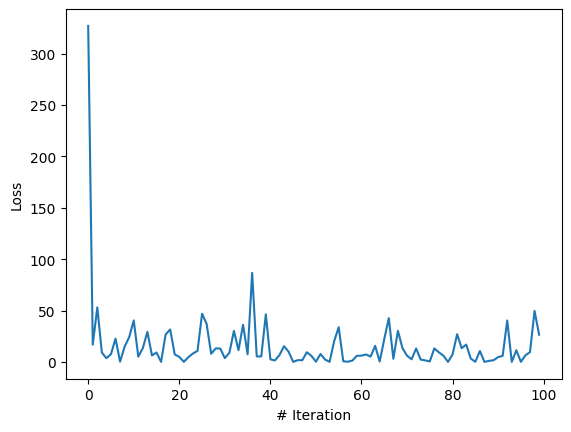

In [30]:
import matplotlib.pyplot as plt
w1, w2, w3, b, losses = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel("# Iteration")
plt.ylabel("Loss")
plt.show()

In [31]:
print ( w1 , w2 , w3 )

0.07405984066396477 0.15917360263437663 0.017561197559948935


In [32]:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3
X , y = prepare_data('advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
sales = predict(tv ,radio ,newspaper ,w1 ,w2 ,w3 ,b )
print (f'predicted sales is {sales}')

predicted sales is 8.176413319549823
